In [52]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
from sklearn.preprocessing import StandardScaler

aggDF = pd.read_csv('../data/aggregatedClean.csv')
X = aggDF.drop(['ID', 'Currency', 'Purchase Amount', 
                'Subscription Start Date', 'Subscription Expiration', 
                'Free Trial Start Date', 'Free Trial Expiration', 'First App Session', 
                'Last App Session'], axis=1)
y = aggDF['Purchase Amount']

# # drop rows with missing values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
# bool_cols = columns where nunique() == 2
bool_cols = [col for col in X.columns if X[col].nunique() == 2]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop(['Churn'])

categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.append(pd.Index(['Churn']))
categorical_cols = categorical_cols.drop(list(bool_cols) + ['Churn'])

# convert bool_cols to int
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)


#z-score normalization
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# one hot encodeing
X = pd.get_dummies(X)

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

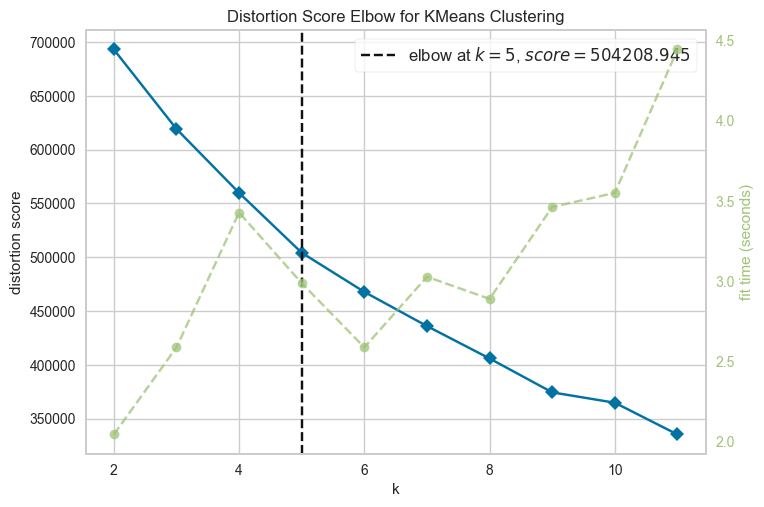

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
from sklearn.preprocessing import StandardScaler

aggDF = pd.read_csv('../data/aggregatedClean.csv')
X = aggDF.drop(['ID', 'Currency', 'Subscription Start Date', 'Subscription Expiration', 
                'Free Trial Start Date', 'Free Trial Expiration', 'First App Session', 
                'Last App Session'], axis=1)
# y = aggDF['Purchase Amount']

# bool_cols = columns where nunique() == 2
bool_cols = [col for col in X.columns if X[col].nunique() == 2]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop(['Churn'])

categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.append(pd.Index(['Churn']))
categorical_cols = categorical_cols.drop(list(bool_cols) + ['Churn'])

# convert bool_cols to int
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# # drop rows with missing values
X.fillna(0, inplace=True)

# z-score normalization
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# one hot encodeing
X = pd.get_dummies(X)

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

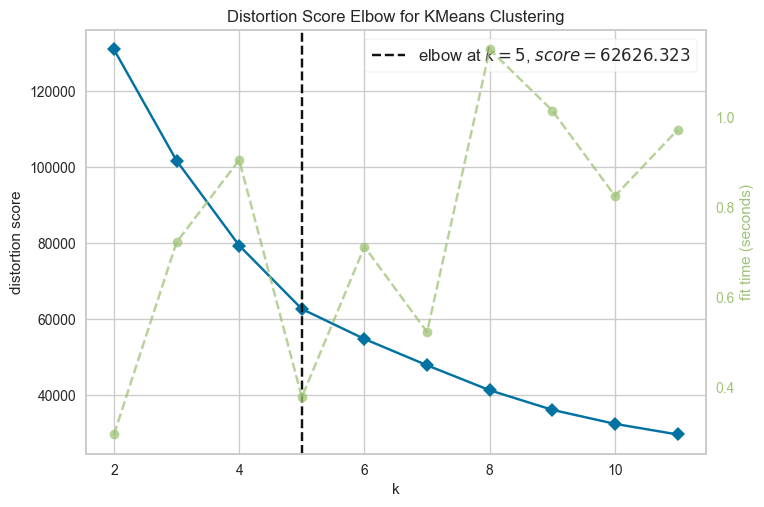

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
features = ['Purchase Amount', 'Send Count', 'Unique Open Count', 'App Launch', 'Churn']

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(X[features])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [51]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(X[features])

# add cluster labels to aggDF
aggDF['Cluster'] = km.labels_

aggDF.to_csv('../data/aggCluster.csv', index=False)

c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


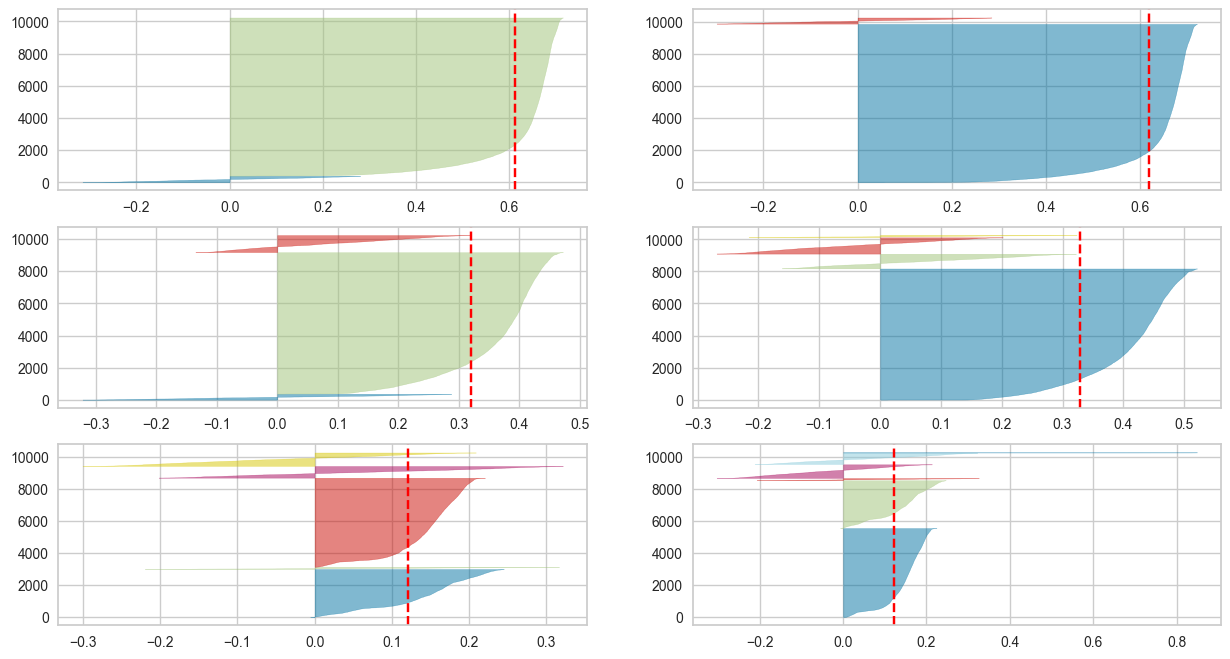

In [32]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

#USING previous X and Y
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 


# Using PCA columns

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load data into a pandas dataframe
df = pd.read_csv('../data/Churn1.csv')
# df = pd.read_csv('../data/subscriberClean.csv')

# Encode categorical variables using LabelEncoder
cat_cols = ['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Select relevant columns for clustering
# X = df[['Purchase Amount', 'Demo User', 'Auto Renew', 'Email Subscriber', 'Push Notifications', 'Open Count', 'App Activity Type', 'Churn']]
X = df[['Purchase Amount', 'Subscription Type', 'App Activity Type', 'Churn']]
# print unique values in each column
# for col in X.columns:
    # print(col, X[col].unique())

X['Purchase Amount'].fillna(0, inplace=True)
# X['Open Count'].fillna(0, inplace=True)
# convert to 1 or 0
# X['Demo User'] = X['Demo User'].apply(lambda x: 1 if x == 'Yes' else 0)
# X['Auto Renew'] = X['Auto Renew'].apply(lambda x: 1 if x == 'On' else 0)
# X['Email Subscriber'] = X['Email Subscriber'].apply(lambda x: 1 if x == 'Yes' else 0)
# X['Push Notifications'] = X['Push Notifications'].apply(lambda x: 1 if x == 'Yes' else 0)

# X = X['Purchase Amount', 'Subscription Type', 'App Activity Type', 'Churn']
# Normalize the data using z-scoring
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define number of clusters
n_clusters = 3

# Fit KMeans clustering algorithm on the scaled data
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)

# # Add cluster labels to the dataframe
# subscriberDF['Cluster'] = kmeans.labels_

# subscriberDF.head()

# # Analyze cluster characteristics
# cluster_summary = df.groupby('Cluster').mean()
# print(cluster_summary)

# count number of subscribers in each cluster


C:\Users\austi\AppData\Local\Temp\ipykernel_24952\601828614.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Purchase Amount'].fillna(0, inplace=True)
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
print(pd.Series(kmeans.labels_).value_counts())

0    24468
2    10436
1     5096
dtype: int64


In [12]:
# subscriberDF = pd.read_csv('../data/subscriberClean.csv')
subscriberDF = pd.read_csv('../data/Churn1.csv')
subscriberDF['Cluster'] = kmeans.labels_
subscriberDF.to_csv('../data/Kmeans_PCA.csv', index=False)

subscriberDF.head()

,ID,App Activity Type,Subscription Expiration,Auto Renew,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,...,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,App Session Platform,App Session Date,Churn,Cluster
0,1,14,6/28/2019,0,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,...,Yes,63.0,7.0,0.0,6.0,0.0,ios,3/20/2019,1,0
1,2,77,2/28/2020,0,EBR,Limited,INITIAL_PURCHASE,Web,39.0,USD,...,Yes,4.0,3.0,0.0,1.0,0.0,android,12/3/2019,1,0
2,3,76,12/31/2019,0,ESP,Limited,INITIAL_PURCHASE,Web,0.0,USD,...,Yes,1.0,0.0,0.0,0.0,0.0,ios,5/2/2019,1,0
3,4,38,2/7/2020,0,KOR,Limited,INITIAL_PURCHASE,App,NaN,NaN,...,Yes,14.0,0.0,0.0,0.0,0.0,ios,2/6/2020,1,0
4,5,151,11/13/2019,0,ENG,Limited,INITIAL_PURCHASE,App,NaN,NaN,...,Yes,80.0,5.0,1.0,5.0,1.0,ios,9/14/2019,1,2


In [13]:
subscriberDF.groupby('Cluster').mean()

C:\Users\austi\AppData\Local\Temp\ipykernel_24952\2065334664.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subscriberDF.groupby('Cluster').mean()


,ID,App Activity Type,Auto Renew,Purchase Amount,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,Churn
Cluster,,,,,,,,,,
0,23700.749510,7.592692,0.0,33.237017,35.888586,5.848438,0.725590,3.494186,0.181056,1.000000
1,21732.476256,12.082221,0.0,204.227293,49.581787,18.727660,5.366389,8.549371,1.019407,0.577512
2,10479.241280,49.872748,0.0,55.414380,16.025979,6.734896,2.993838,1.994321,0.329024,0.021368
